# GMM - UBM for Language Identification

### Import Statements

In [1]:
from sklearn.mixture import GaussianMixture as GM
import os
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


### Reading data & Preprocessing

In [3]:
path = '/drive/My Drive/Pattern Recognition/Assignment2/CSV Files/'

In [4]:
languages = sorted(os.listdir(path))
print(languages)
languages_path = [path+i for i in languages]

['asm', 'ben', 'eng', 'guj', 'hin', 'kan', 'mal', 'mar', 'odi', 'pun', 'tam', 'tel']


In [5]:
train_subfolder = 'PB_train/'
pb_test_subfolder = 'PB_test/' 
yt_test_subfolder = 'YT_test/'

In [6]:
def read_csvfiles(path, subfolder):
    out = []
    for p in path:
        mp = p+'/'+subfolder 
        files = [mp+i for i in os.listdir(mp)]
        l = []
        for file in files:
            df = pd.read_csv(file, delimiter=',', header=None, encoding='utf-16')
            l.append(df)
        out.append(l)
    return out

In [7]:
train = read_csvfiles(languages_path, train_subfolder)

In [8]:
pb_test = read_csvfiles(languages_path, pb_test_subfolder)

In [9]:
yt_test = read_csvfiles(languages_path, yt_test_subfolder)

In [10]:
def concat(data):
    concat_data = np.empty([0,39])
    for i in data:
        for j in i:
            n = np.array(j)
            concat_data = np.concatenate((concat_data,n),axis=0)
    return concat_data

### Pooling data for UBM

In [11]:
master_train = concat(train)

In [12]:
#master_pb_test = concat(pb_test)

In [13]:
#master_yt_test = concat(yt_test)

### UBM Model

In [14]:
classifier = GM(n_components=12, init_params='kmeans', covariance_type='full')
classifier.fit(master_train)

GaussianMixture(n_components=12)

In [15]:
print('WEIGHTS:', classifier.weights_)

WEIGHTS: [0.09735499 0.06006762 0.14449302 0.08413482 0.06280968 0.09127711
 0.05298223 0.07597854 0.0935676  0.11373971 0.07029737 0.05329731]


*means to be adapted*

In [25]:
mean = classifier.means_
cov = classifier.covariances_

### Individual Features Extration

##### Preprocessing data

In [21]:
def read_data(path):
    subpath = [path+'/PB_train/', path+'/PB_test/', path+'/YT_test/'] 
    data = []
    for p in subpath:
        temp = []
        for files in os.listdir(p):
            df = pd.read_csv(p+files, delimiter=',', header=None, encoding='utf-16')
            temp.append(np.array(df))
        data.append(temp)

    return data[0], data[1], data[2]

In [22]:
def concat(data):
    concat_data = np.empty([0,39])
    for i in data:
        n = np.array(i)
        concat_data = np.concatenate((concat_data,n),axis=0)
    return concat_data

##### Reading files

In [23]:
asm_train, asm_pbtest, asm_yttest = read_data(languages_path[0])
asm_train = concat(asm_train)
ben_train, ben_pbtest, ben_yttest = read_data(languages_path[1])
ben_train = concat(ben_train)
eng_train, eng_pbtest, eng_yttest = read_data(languages_path[2])
eng_train = concat(eng_train)
guj_train, guj_pbtest, guj_yttest = read_data(languages_path[3])
guj_train = concat(guj_train)
hin_train, hin_pbtest, hin_yttest = read_data(languages_path[4])
hin_train = concat(hin_train)
kan_train, kan_pbtest, kan_yttest = read_data(languages_path[5])
kan_train = concat(kan_train)
mal_train, mal_pbtest, mal_yttest = read_data(languages_path[6])
mal_train = concat(mal_train)
mar_train, mar_pbtest, mar_yttest = read_data(languages_path[7])
mar_train = concat(mar_train)
odi_train, odi_pbtest, odi_yttest = read_data(languages_path[8])
odi_train = concat(odi_train)
pun_train, pun_pbtest, pun_yttest = read_data(languages_path[9])
pun_train = concat(pun_train)
tam_train, tam_pbtest, tam_yttest = read_data(languages_path[10])
tam_train = concat(tam_train)
tel_train, tel_pbtest, tel_yttest = read_data(languages_path[11])
tel_train = concat(tel_train)

##### Building Individual Classifiers

In [24]:
asm = GM(n_components=1, init_params='kmeans', covariance_type='full')
asm.fit(asm_train)
ben = GM(n_components=1, init_params='kmeans', covariance_type='full')
ben.fit(ben_train)
eng = GM(n_components=1, init_params='kmeans', covariance_type='full')
eng.fit(eng_train)
guj = GM(n_components=1, init_params='kmeans', covariance_type='full')
guj.fit(guj_train)
hin = GM(n_components=1, init_params='kmeans', covariance_type='full')
hin.fit(hin_train)
kan = GM(n_components=1, init_params='kmeans', covariance_type='full')
kan.fit(kan_train)
mal = GM(n_components=1, init_params='kmeans', covariance_type='full')
mal.fit(mal_train)
mar = GM(n_components=1, init_params='kmeans', covariance_type='full')
mar.fit(mar_train)
odi = GM(n_components=1, init_params='kmeans', covariance_type='full')
odi.fit(odi_train)
pun = GM(n_components=1, init_params='kmeans', covariance_type='full')
pun.fit(pun_train)
tam = GM(n_components=1, init_params='kmeans', covariance_type='full')
tam.fit(tam_train)
tel = GM(n_components=1, init_params='kmeans', covariance_type='full')
tel.fit(tel_train)

GaussianMixture()

##### Obtaining Partial Estimate of Mean Vector

In [26]:
asm_mean = asm.means_
ben_mean = ben.means_
eng_mean = eng.means_
guj_mean = guj.means_
hin_mean = hin.means_
kan_mean = kan.means_
mal_mean = mal.means_
mar_mean = mar.means_
odi_mean = odi.means_
pun_mean = pun.means_
tam_mean = tam.means_
tel_mean = tel.means_

partial_means = [asm_mean, ben_mean, eng_mean, guj_mean, hin_mean, kan_mean, mal_mean, mar_mean, odi_mean, pun_mean, tam_mean, tel_mean]

In [28]:
# No of samples in each class:
No_samples  = []
for i in range(12):
  pth = languages_path[i]+'/PB_train/'
  No_samples.append(len(os.listdir(pth)))

Nk = No_samples
Nk

[719, 379, 244, 358, 359, 391, 398, 241, 398, 242, 241, 388]

### MAP Adaptation

In [30]:
def map_adaptation(xk, Nk, mu_k):
  r = 0.7
  alpha_k = Nk/(Nk + r)
  return (alpha_k * xk) + (1 - alpha_k) * mu_k

In [33]:
map_adaptation(asm_mean, Nk[0], mean).shape

(12, 39)

In [34]:
map_adaptation(ben_mean, Nk[0], mean).shape

(12, 39)

In [36]:
adapted_mean = []
for i in range(12):
  val = map_adaptation(partial_means[i], Nk[i], mean)
  adapted_mean.append(val)

In [39]:
adapted_mean = np.array(adapted_mean)

##### Adapted Classifiers

### Testing Phase

In [16]:
def preprocess(data):
  result = []
  for i in data:
    for j in i:
      result.append(np.array(j).reshape(-1, 1))
  return np.array(result)

In [17]:
pb_test_prep = preprocess(pb_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
yt_predict = classifier.predict(yt_test)
yt_predict

In [ ]:
def preprocess(data):
  result = []
  for i in data:
    for j in i:
      result.append(np.array(j))
  return result

In [ ]:
def get_scores(lang, test):
    return np.mean(lang.score_samples(test))

In [ ]:
def get_gt(c, n):
    return [c for i in range(n)]

In [ ]:
def system_predict(dataset):
    res = []
    for i in dataset:
        lh = get_scores(classifier, i)

        res.append(lh)
        
    return res

In [ ]:
pb_test_prep = preprocess(pb_test)

In [ ]:
predicted_pb = system_predict(pb_test_prep)
#predicted_pb

### Performance Measures

In [25]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [36]:
pb_acc = [0.708, 0.835, 0.869]
yt_acc = [0.073, 0.085, 0.083]
parms = [1, 5, 12]

In [37]:
pb_acc_d = [0.581, 0.684, 0.737] #diagn covariance
yt_acc_d = [0.083, 0.090, 0.086] #diagn covariance

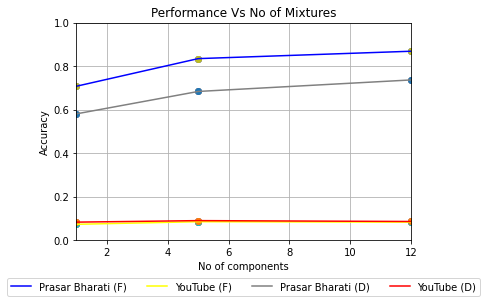

In [45]:
plt.plot(parms, pb_acc, 'blue')
plt.plot(parms, yt_acc, 'yellow')
plt.plot(parms, pb_acc_d, 'gray')
plt.plot(parms, yt_acc_d, 'red')

for i in range(3):
  plt.scatter(parms, pb_acc)
  plt.scatter(parms, yt_acc)
  plt.scatter(parms, pb_acc_d)
  plt.scatter(parms, yt_acc_d)


plt.title('Performance Vs No of Mixtures')
plt.xlabel('No of components')
plt.ylabel('Accuracy')
plt.legend(['Prasar Bharati (F)', 'YouTube (F)', 'Prasar Bharati (D)', 'YouTube (D)'], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlim(1, 12)
plt.ylim(0, 1)
plt.grid()
plt.show()

### Test Results

In [47]:
from matplotlib import pyplot as plt

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
f1 = f1_score(gt, predicted, average='weighted')
precision = precision_score(gt, predicted, average='weighted')
recall = recall_score(gt, predicted, average='weighted')
accuracy = accuracy_score(gt, predicted)

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('F1 Score: ', f1)

Accuracy:  0.961828282827968
Recall:  0.9667879622001
Precision:  0.9701989827961
F1 Score:  0.9596857670979667


In [43]:
lang_dict = {0:'Assam', 1:'Bengali', 2:'English', 3:'Gujarati', 4:'Hindi', 
             5:'Kannada', 6:'Malayalam', 7:'Marati', 8:'Odissa', 9:'Punjabi', 10:'Tamil', 11:'Telugu'}

In [66]:
confusion_matrix = metrics.confusion_matrix(gt, predicted, labels=list(lang_dict.keys()))

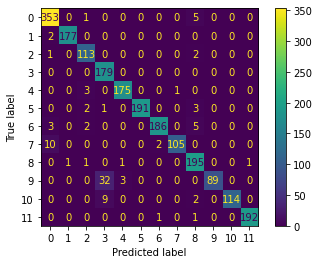

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(lang_dict.keys()))
disp.plot()
plt.show()